<b>Problem 1.</b> In this problem we investigate the effect of $L^1$ and $L^2$ regularization for binary logistic regression.  Recall that the model is,
$$
p (y_n  = 1 | x_n, w) = \frac{1}{ 1 + \exp ( - w^T x_n ) }
$$
We use the 100,000-dimensional Dorothea dataset split into 400 training, 400 validation and 350 test examples.  We investigate the interaction of sparisty and regularization.

We want to find weights that minimize the objective function, 
$$
f(w) = - C \sum_{n=1}^N \log p (t_n | x_n, w) + \sum_{m=1}^M L ( w_m)
$$
for a loss function $L$.  In the case of $L^1$ or $L^2$ regularization we can use the logregFit function from the matlab pmtk3 package to find the coefficients. (Note: as I am implementing this in python, I instead directly call the implementation of the LibLinear package which is available in sklearn)

In the following problems we use the validation set to choose between $C \in \{ 10^{-5}, 10^{0}, \dots 10^{25}\}$

<b>1.a)</b> Train logistic regression models with Gaussian/$L^2$ regularization on the training data. Create a plot of the validation error rate as a function of $C$.

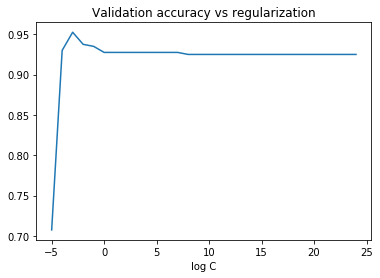

In [1]:
import numpy as np
from scipy.io import loadmat
data = loadmat('dorothea.mat')
keys = list(data.keys())[3:9]
import imp
import hw6
import matplotlib.pyplot as plt
imp.reload(hw6)
lR = hw6.binLogistic()
lR.loadData(data, keys)
a, b = -5, 25
lambdas = np.power(10.0, np.arange(a, b))
coeffsL2 = {}
acc = np.zeros(b-a)
for i in range(b-a):
    lR.fit(penalty = 'l2', C=lambdas[i])
    coeffsL2[i] = [lR.b, lR.w]
    acc[i] = lR.acc(lR.xVal, lR.yVal)
plt.plot(np.arange(a, b), acc)
plt.title('Validation accuracy vs regularization')
plt.xlabel('log C')
plt.show()

<b>1.b)</b> Report the $C$ giving the optimal error rate on the validation data and its error rate on the test data.  Report the number of non-zero entries in the vector of coefficients.

In [2]:
print('The C giving the best validation accuracy is: 10^', np.argmax(acc)+a)
#lR.fit(penalty='l2', C = lambdas[np.argmax(acc)])
lR.w = coeffsL2[np.argmax(acc)][1]
lR.b = coeffsL2[np.argmax(acc)][0]
print('The accuracy of this classifer on the test data is: '+'{:.4f}'.format(lR.acc(lR.xTest, lR.yTest)))
print('The number of non-zero coefficients is', np.count_nonzero(lR.w))

The C giving the best validation accuracy is: 10^ -3
The accuracy of this classifer on the test data is: 0.9371
The number of non-zero coefficients is 75581


<b>1.c)</b> Repeat (a), (b) for $L^1$ penalty.

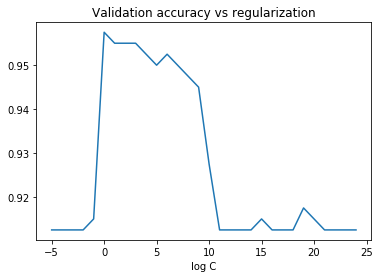

The C giving the best validation accuracy is: 10^ 0
The accuracy of this classifer on the test data is: 0.9257
The number of non-zero coefficients is 141


In [3]:
imp.reload(hw6)
lR = hw6.binLogistic()
lR.loadData(data, keys)
acc = np.zeros(b-a)
coeffsL1 = {}
for i in range(b-a):
    lR.fit(penalty = 'l1', C=lambdas[i])
    coeffsL1[i] = [lR.b, lR.w]
    acc[i] = lR.acc(lR.xVal, lR.yVal)
plt.plot(np.arange(a, b), acc)
plt.title('Validation accuracy vs regularization')
plt.xlabel('log C')
plt.show()

print('The C giving the best validation accuracy is: 10^', np.argmax(acc)+a)
lR.w = coeffsL1[np.argmax(acc)][1]
lR.b = coeffsL1[np.argmax(acc)][0]
print('The accuracy of this classifer on the test data is: '+'{:.4f}'.format(lR.acc(lR.xTest, lR.yTest)))
print('The number of non-zero coefficients is', np.count_nonzero(lR.w))

<b>1d)</b> What happens to the validation error rate for the $L^1$ regularization when $C$ is small?

In [4]:
lR.fit(penalty='l1', C= lambdas[0])
y = lR.predict(lR.xVal)
print('For such a small C, the coefficients decrease to almost zero and the classifer predicts the same class for every entry.  Percentage of predictions that are -1:', np.sum(y.flatten()==-1)/len(y.flatten()))

For such a small C, the coefficients decrease to almost zero and the classifer predicts the same class for every entry.  Percentage of predictions that are -1: 1.0


<b>1e)</b> The Huber loss function is defined for a parameter $\delta >0$ as
$$
L_\delta (w) = \begin{cases} w^2/2, & |w| \leq \delta \\ \delta |w| - \delta^2 / 2& |w| > \delta \end{cases}
$$
Implement a gradient based algorithm for fitting the Huber regularized logistic regression.  Train the models using $\delta = 100$ and $C$ as above.  Report validation error rate as a function of $C$.  

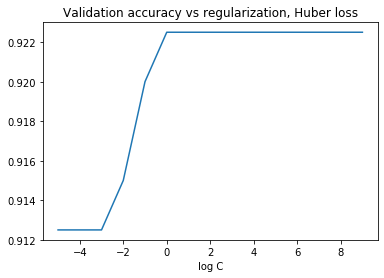

In [8]:
imp.reload(hw6)
lH = hw6.binHuber()
lH.loadData(data, keys)
c = -5
d= 10
lambdas = np.power(10.0, np.arange(c, d))
coeffsH = {}
acc = np.zeros(d-c)
for i in range(d-c):
    lH.fit(lambdas[i], 100.0)
    coeffsH[i] = [lH.w]
    acc[i] = lH.acc(lH.xVal, lH.yVal)
   
plt.plot(np.arange(c, d), acc)
plt.title('Validation accuracy vs regularization, Huber loss')
plt.xlabel('log C')
plt.show()

<b>1i)</b> Set $\delta$ to be the median of the absolute value of the weights obtained from the logistic regression model with $L^2$ regularization and $C = 10^8$.  Create a plot of the validation error rate as a function of $C$.  Report the constant giving the best validation error, as well as the error rate of this classifier on the test data, and the number of non-zero coefficients.

In [10]:
delta = np.median(np.abs(coeffsL2[8-c][1]))
coeffsH = {}
acc = np.zeros(d-c)

for i in range(d-c):
    lH.fit(lambdas[i], delta)
    coeffsH[i] = [lH.w]
    acc[i] = lH.acc(lH.xVal, lH.yVal)

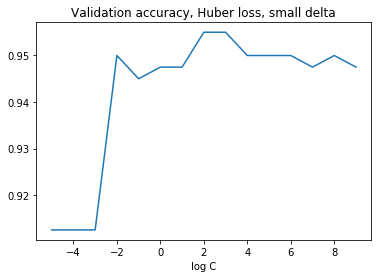

The C giving the best validation accuracy is: 100.0
The accuracy of this classifer on the test data is: 0.9314
The number of non-zero coefficients is 75582


In [14]:
plt.plot(np.arange(c, d), acc)
plt.title('Validation accuracy, Huber loss, small delta')
plt.xlabel('log C')
plt.show()

print('The C giving the best validation accuracy is:', lambdas[np.argmax(acc)])
#lR.fit(penalty='l1', C = lambdas[np.argmax(acc)])
lH.w = coeffsH[np.argmax(acc)][0]
print('The accuracy of this classifer on the test data is: '+'{:.4f}'.format(lH.acc(lH.xTest, lH.yTest)))
print('The number of non-zero coefficients is', np.count_nonzero(lH.w))

<b> Problem 2.</b> In this problem we will compare the behavior of Stochastic Gradient Descent (SGD) on a subset of the MNIST dataset (digits only 4 or 9) to that of a full data-gradient descent.

<b>2.a)</b> As a baseline, use an optimization method with L-BFGS to fit a logistic regression model to this dataset.  Report the number of function evaluations needed to fit, as well as the test accuracy.

In [16]:
imp.reload(hw6)
data = loadmat('MNIST_Digits49_19x19.mat')
keys = list(data.keys())[3:7]
bS = hw6.binLogSGD()
bS.loadData(data, keys)

bS.fitLBFGS()
print('Number of function evaluations:', bS.iter)
print('Test accuracy: '+'{:.4f}'.format(bS.acc(bS.xTest, bS.yTest)))

Number of function evaluations: 103
Test accuracy: 0.9633


<b>2.b)</b> Implement a stochastic gradient descent algorithm.  Train three models using batch sizes of 1, 100 and 11791.  Fix a step size schedule $\eta_t = (10+t)^{-0.51}$.  Run the algorithm for 30 epochs.  Create two figures: training accuracy and test accuracy as a function of epochs for each batch size.

In [19]:
imp.reload(hw6)
data = loadmat('MNIST_Digits49_19x19.mat')
keys = list(data.keys())[3:7]
bS = hw6.binLogSGD()
bS.loadData(data, keys)
epochs = 30

testAcc = {}
trainAcc = {}
steps = np.power(10.0+np.arange(epochs), -0.51)

for batches in [1, 100, 11791]:
    bS.fitSGD(batches = batches, epochs=epochs, steps = steps)
    testAcc[batches]= bS.testAcc
    trainAcc[batches]= bS.trainAcc


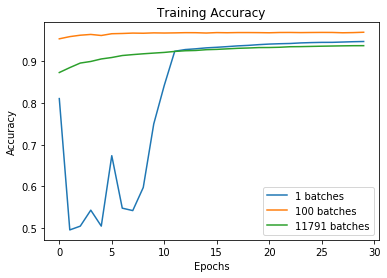

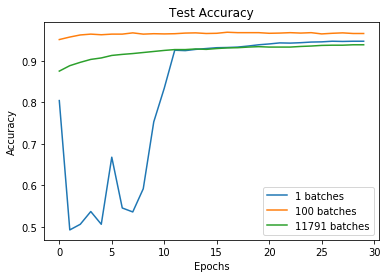

In [20]:
plt.plot(trainAcc[1], label='1 batches')
plt.plot(trainAcc[100], label='100 batches')
plt.plot(trainAcc[11791], label='11791 batches')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training Accuracy')
plt.show()

plt.plot(testAcc[1], label='1 batches')
plt.plot(testAcc[100], label='100 batches')
plt.plot(testAcc[11791], label='11791 batches')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Test Accuracy')
plt.show()

<b>2c)</b> Repeat the previous problem for a step size schedule of $\eta_t = (10+t)^{-0.7}$.

In [21]:
imp.reload(hw6)
epochs = 30

testAcc = {}
trainAcc = {}
steps = np.power(10.0+np.arange(epochs), -0.7)

for batches in [1, 100, 11791]:
    bS.fitSGD(batches = batches, epochs=epochs, steps = steps)
    testAcc[batches]= bS.testAcc
    trainAcc[batches]= bS.trainAcc

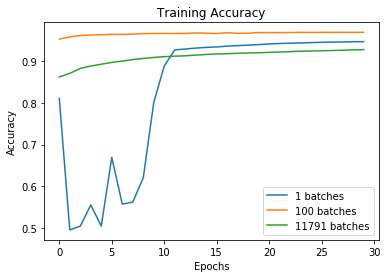

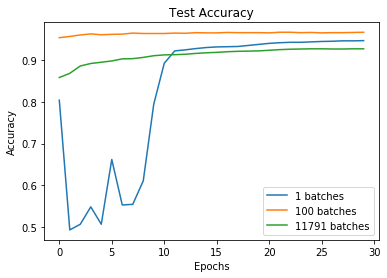

In [22]:
plt.plot(trainAcc[1], label='1 batches')
plt.plot(trainAcc[100], label='100 batches')
plt.plot(trainAcc[11791], label='11791 batches')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training Accuracy')
plt.show()

plt.plot(testAcc[1], label='1 batches')
plt.plot(testAcc[100], label='100 batches')
plt.plot(testAcc[11791], label='11791 batches')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Test Accuracy')
plt.show()